In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import simplejson

In [2]:
from clean import split_score,split_review,run

In [3]:
df_info = pd.read_excel(r"../row_data/dianping_info.xlsx")
df_review = pd.read_excel(r"../row_data/dianping_review.xlsx")
df = pd.merge(split_score(df_info),split_review(df_review))
df["口味"] = pd.to_numeric(df["口味"],errors='coerce')
df["环境"] = pd.to_numeric(df["环境"],errors='coerce')
df["服务"] = pd.to_numeric(df["服务"],errors='coerce')
df["不用排队%"] = df["不用排队"]/df["评论总数"]
df.head()

,人均价格,店铺id,店铺名,店铺地址,店铺总分,推荐菜,标签1,标签2,评论总数,口味,环境,服务,中评个数,好评个数,差评个数,不用排队,不用排队%
0,359,k4izwDTOIfiYQDsF,上隐水产海鲜刺身自助餐·甄选(淮海百盛店),淮海中路918号百盛购物中心7楼,4.5,-,自助餐,淮海路,21190,4.6,4.2,4.5,2236,17601,1353,295.0,0.013922
1,141,j6sMBvEoL22p8x9P,威尼斯海鲜自助餐厅(壹丰广场店),四川北路1363号壹丰广场L3-A01、A01-1、A08（近四川北路4号口）,4.1,-,自助餐,四川北路/海伦路,4061,4.1,4.1,4.1,717,3066,278,102.0,0.025117
2,122,G5tG02B1RMco2ydO,東盛自助料理(南京东路店),南京东路353号悦荟广场6楼601室（地铁2/10号线南京东路站1号口3号口出）,4.5,-,自助餐,南京东路,13914,4.4,4.5,4.5,1839,11482,593,216.0,0.015524
3,132,l1MCIbtbVyNohOzs,威尼斯海鲜自助餐厅(中环百联店),真光路1288号三楼B区G08-3F-1-B3F013商铺,4.5,-,自助餐,梅川路步行街,8627,4.4,4.4,4.4,1115,7083,429,172.0,0.019937
4,428,Eq4YAd4pZ5LtHkfu,万岛日本料理铁板烧(吴中店),吴中路369号美恒大厦2层,4.8,-,日式自助,虹桥镇,12024,4.8,4.8,4.8,834,10842,348,87.0,0.007236


In [4]:
df.标签1.value_counts()

自助餐        45
日式自助       12
烧烤烤串       10
日本料理        3
韩式烤肉        2
法国菜         1
日式烧烤/烤肉     1
意大利菜        1
Name: 标签1, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/home/daisy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daisy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38138 (\N{CJK UNIFIED IDEOGRAPH-94FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daisy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daisy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daisy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.

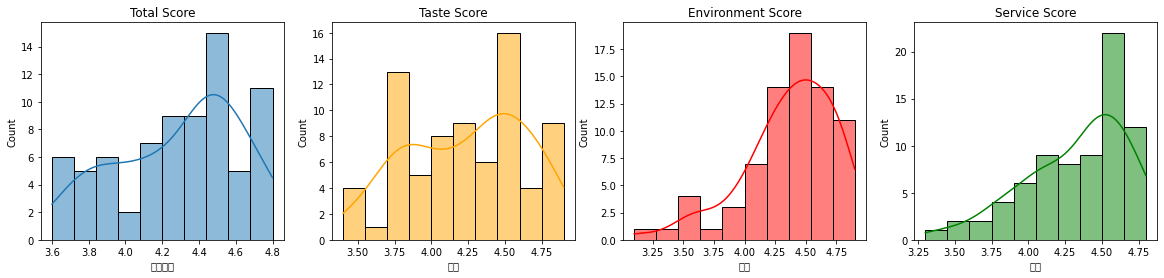

In [49]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.title('Total Score')
sns.histplot(df['店铺总分'], kde=True,bins=10)

plt.subplot(1, 4, 2)
plt.title('Taste Score')
sns.histplot(df['口味'], kde=True,bins=10, color='orange')

plt.subplot(1, 4, 3)
plt.title('Environment Score')
sns.histplot(df['环境'], kde=True, color='r',bins=10)

plt.subplot(1, 4, 4)
plt.title('Service Score')
sns.histplot(df['服务'], kde=True, color='g',bins=10);

In [7]:
df.dtypes

人均价格       int64
店铺id      object
店铺名       object
店铺地址      object
店铺总分     float64
推荐菜       object
标签1       object
标签2       object
评论总数       int64
口味       float64
环境       float64
服务       float64
中评个数       int64
好评个数       int64
差评个数       int64
不用排队     float64
不用排队%    float64
dtype: object

In [9]:
df_analysis = df.drop(columns=['店铺id','店铺地址','标签1','标签2','推荐菜','店铺名'])
df_analysis.head()

,人均价格,店铺总分,评论总数,口味,环境,服务,中评个数,好评个数,差评个数,不用排队,不用排队%
0,359,4.5,21190,4.6,4.2,4.5,2236,17601,1353,295.0,0.013922
1,141,4.1,4061,4.1,4.1,4.1,717,3066,278,102.0,0.025117
2,122,4.5,13914,4.4,4.5,4.5,1839,11482,593,216.0,0.015524
3,132,4.5,8627,4.4,4.4,4.4,1115,7083,429,172.0,0.019937
4,428,4.8,12024,4.8,4.8,4.8,834,10842,348,87.0,0.007236


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_analysis)
df_transformed = pd.DataFrame(scaler.transform(df_analysis), columns = df_analysis.columns)
df_transformed.head()

,人均价格,店铺总分,评论总数,口味,环境,服务,中评个数,好评个数,差评个数,不用排队,不用排队%
0,1.142191,0.626826,2.541198,0.908431,-0.439042,0.505914,2.741098,2.406456,3.479906,2.505418,0.319310
1,-0.572669,-0.563350,-0.403115,-0.334860,-0.708945,-0.643891,0.012884,-0.439816,-0.186204,0.287319,1.548987
2,-0.722129,0.626826,1.290522,0.411115,0.370667,0.505914,2.028063,1.208221,0.888051,1.597492,0.495301
3,-0.643466,0.626826,0.381737,0.411115,0.100764,0.218463,0.727715,0.346801,0.328756,1.091811,0.980071
4,1.684968,1.519458,0.965649,1.405747,1.180376,1.368268,0.223023,1.082895,0.052519,0.114927,-0.415086


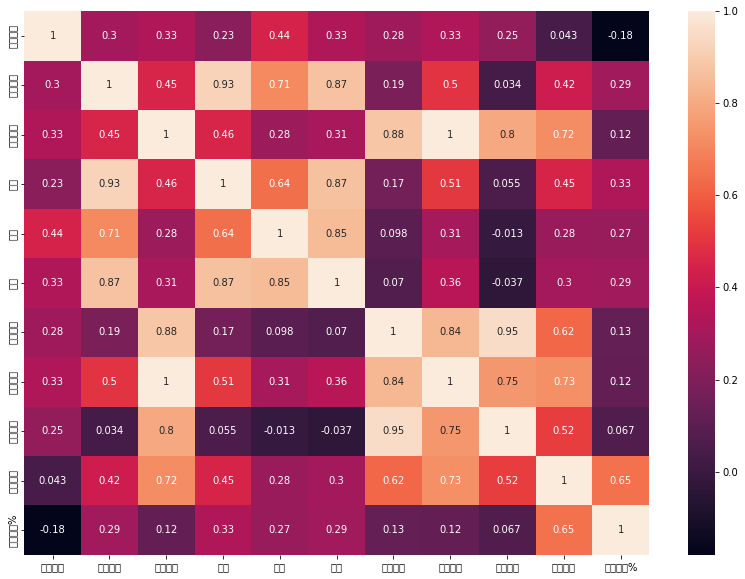

In [36]:
corrMatrix = df_transformed.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show();